# Script for generating slope curves from non-adiabatic AC Calorimetry data

## Loading Python packages
This can be ignored for inexperienced Python users. 

In [20]:
import pandas as pd   #Package for opening and reading data files
from matplotlib import pyplot as plt #Package for generating plots
import numpy as np #Package for handling arrays
from scipy.signal import savgol_filter #Savitzky Golay filter package
%matplotlib widget

## Loading data from desktop
Data format: The data must consist of one column with t and the second column must contain T. TODO !!!

In [2]:
path = r'Data'

#Place your own data files in the folder Data and change the names of file1 (and file2) below such that it matches the name of your datafile.

#First data file
file1 = 'Datafile 1.txt'
label1 = 'Sample 1' # Label1 is the name you want to use in the legends of the plots for this datafile
df1 = pd.read_csv(f'{path}/{file1}', sep='\t', header=2) #Open the first data file. df1 = short name for data file 1

time1 = df1['Time [s]']  # TODO text on how to change this. Alternative: row number df1.iloc[:,0]
temp1 = df1['T0 [degC]']




# Second data file
file2 = 'Datafile 2.txt'
label2 = 'Sample 2'
df2 = pd.read_csv(f'{path}/{file2}', sep='\t', header=2) #Open the second data file.

time2 = df2['Time [s]']  
temp2 = df2['T0 [degC]']


## Plot of the raw measurement data

A list of the color names can be found here: [link to plt colors](https://matplotlib.org/3.4.2/gallery/color/named_colors.html)

The Savitzky-Golay filter which will be used to calculate the time derivatives $dT_s/dt$ requires the data to be sampled with a constant sampling time. The code below ensures evenly distributed data points in time by interpolating the data into two arrays (`time1_SG` and `temp1_SG`). The subscript SG refers to Savitzky-Golay, as these are to be used in the Savitzky-Golay filter. 

Text(0, 0.5, 'Temperature [$\\degree$C]')

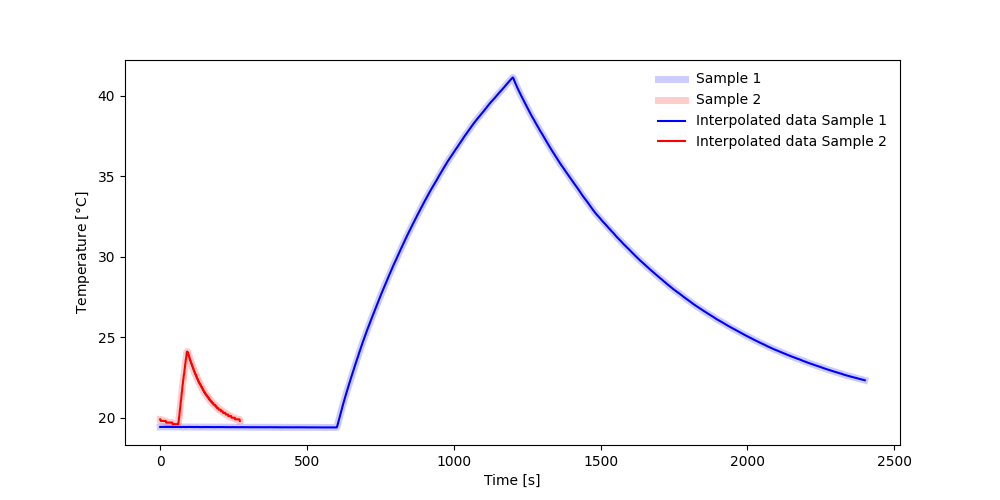

In [53]:
fig, ax  = plt.subplots(1,1,figsize=(10,5)) #Create a plot window with 1 graph. Adjust the size of the figure by figsize=(width,height)


#Plot of the raw data
ax.plot(time1,temp1,label = label1, linewidth=5, color='blue' , alpha = 0.2) #plot DeltaT vs time. alpha = transparency.
ax.plot(time2,temp2,label = label2, linewidth=5, color='red' , alpha = 0.2 ) #plot DeltaT vs time


#Interpolation of data
time1_SG = np.linspace(time1.iloc[0] , time1.iloc[-1] , len(time1))
temp1_SG = np.interp(time1_SG , time1 , temp1)
ax.plot(time1_SG , temp1_SG , color='blue', label = 'Interpolated data Sample 1')

dt2 = np.mean(np.diff(time2))  #Average sampling time
time2_SG = np.linspace(time2.iloc[0] , time2.iloc[-1] , len(time2))
temp2_SG = np.interp(time2_SG , time2 , temp2)
ax.plot(time2_SG , temp2_SG , color='red', label = 'Interpolated data Sample 2')


ax.legend(frameon=False) #Print the legend inside the figures

ax.set_xlabel('Time [s]')
ax.set_ylabel(r'Temperature [$\degree$C]')



## Sample specification

In [5]:
c = 4184  #Specific heat capacity of water ,J/(K kg)
rho = 1000 # mass density, kg/m^3
V = 1e-3*1e-3 # Sample volume in L 

C = rho*c*V #Heat capacity of the sample J/K

c_MNP = 3 #mg/ml #Concentration of magnetic nanoparticles in the sample. 




## Settings Savitzky-Golay filter

In [28]:
polyorder   = 1  # Polynomial order
Nsavgol     = 6 # Window size (number of Datapoints) 


dt1 = np.mean(np.diff(time1_SG))  #Average sampling time Sample 1
print('Sample 1 Savitzky-Golat filter window width in time:' , Nsavgol*dt1 ,'s') # Confirm that your time unit is also s in your data file.

dt2 = np.mean(np.diff(time2_SG))  #Average sampling time Sample 2
print('Sample 2 Savitzky-Golat filter window width in time:' , Nsavgol*dt2 ,'s')



Sample 1 Savitzky-Golat filter window width in time: 3.0012507091932457 s
Sample 2 Savitzky-Golat filter window width in time: 5.999643586715866 s


## Plot Slope curves

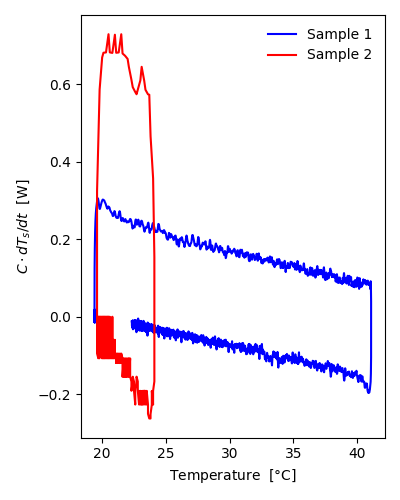

In [54]:
fig,ax = plt.subplots(figsize=(4,5))

CdTdt1 = C*savgol_filter(temp1_SG, Nsavgol, polyorder,1,dt1) #Calculate the C*dT/dt
ax.plot(temp1_SG , CdTdt1 , color='blue' , label = label1)

CdTdt2 = C*savgol_filter(temp2_SG, Nsavgol, polyorder,1,dt2) #Calculate the C*dT/dt
ax.plot(temp2_SG , CdTdt2 , color='red' , label = label2)

ax.legend(frameon=False)
ax.set_xlabel(r'Temperature  [$\degree$C]')
ax.set_ylabel(r'$C \cdot dT_s/dt$  [W]')

plt.tight_layout()
